<a href="https://colab.research.google.com/github/DidiRamsaran/AI_ML_projects/blob/main/ReinforcementLearning_Practicum_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution to a labertinh with reinforcement learning

Inteligencia artificial: aprendizaje automatico (2024).

P. Garcia

##Team members:
1. Didi Ramsaran-Chin
2. Victor Pietrini
3. Kevin Fernández
4. Luis Fernando Días

In [ ]:
# Librerias
import numpy as np
import networkx as nx
import graphviz as Graph
import matplotlib.pyplot as plt
import random

from dijkstar import Graph, find_path

## Matriz de recompenzas (R)

In [ ]:
R = np.matrix([[-1,-1,-1,-1,0,-1],
							 [-1,-1,-1,0,-1,100],
		 					 [-1,-1,-1,0,-1,-1],
							 [-1,0,0,-1,0,-1],
							 [-1,0,0,-1,-1,100],
							 [-1,0,-1,-1,0,100]])

'\nrandom.lenght = random.randint(4, 21)\nR = np.full((random.lenght, random.lenght, -1))\n\nrl = randon.randint(0, random.lenght)\nR[0,rl]= 100\n\n'

Visualización de matriz como red


In [ ]:
G = nx.Graph()

G.add_nodes_from([0, R.shape[1]-1])

for column in range(R.shape[0]):
  for i in range(R.shape[0]):
    if R[i, column] == 0:
      G.add_edge((i), (column))
    elif R[i, column] == 100:
      G.add_edge((i), (column))

print("nodes are the following:")
print(G.nodes)
print("edges between them are:")
print(G.edges)


nodes are the following:
[0, 5, 3, 1, 4, 2]
edges between them are:
[(0, 4), (5, 1), (5, 4), (5, 5), (3, 1), (3, 2), (3, 4), (1, 4), (4, 2)]


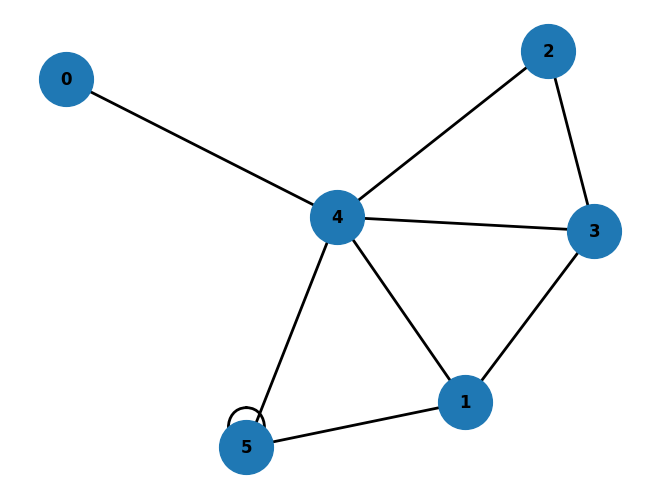

In [ ]:
options = {
    'node_size': 1500,
    'width': 2,
}

pos = nx.spring_layout(G)

nx.draw(G, pos=pos, with_labels=True, font_weight='bold', **options)

# Matriz de calidad de las acciones (Q)

In [ ]:
Q = np.matrix(np.zeros([6,6]))

## Funciones auxiliares

In [ ]:
# Gamma (learning parameter).
gamma = 0.8

# Initial state. (Usually to be chosen at random)
initial_state = 1

# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

# Get available actions in the current state
available_act = available_actions(initial_state)

# This function chooses at random which action to be performed within the range
# of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q
# learning algorithm
def update(current_state, action, gamma):

    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    # Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value

# Update Q matrix
update(initial_state,action,gamma)



<ipython-input-44-224e507c3e97>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act,1))
<ipython-input-44-224e507c3e97>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))


## Training

In [ ]:
# Train over 10 000 iterations. (Re-iterate the process above).
for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)

# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)




<ipython-input-44-224e507c3e97>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act,1))
<ipython-input-44-224e507c3e97>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))
<ipython-input-44-224e507c3e97>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)


Trained Q matrix:
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]


## Testing

In [ ]:
# Goal state = 5
# Best sequence path starting from 2 -> 2, 3, 1, 5

current_state = 2
steps = [current_state]

while current_state != 5:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

# Print selected sequence of steps
print("Selected path:")
print(steps)

#-------------------------------------------------------------------------------
#                               OUTPUT
#-------------------------------------------------------------------------------
#
# Trained Q matrix:
#[[   0.     0.     0.     0.    80.     0. ]
# [   0.     0.     0.    64.     0.   100. ]
# [   0.     0.     0.    64.     0.     0. ]
# [   0.    80.    51.2    0.    80.     0. ]
# [   0.    80.    51.2    0.     0.   100. ]
# [   0.    80.     0.     0.    80.   100. ]]
#
# Selected path:
# [2, 3, 1, 5]
#

Selected path:
[2, 3, 1, 5]


<ipython-input-46-e315c76f3285>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(next_step_index)
<ipython-input-46-e315c76f3285>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(np.random.choice(next_step_index, size = 1))


graficación del camino tomado

[(2, 3), (3, 1), (1, 5)]


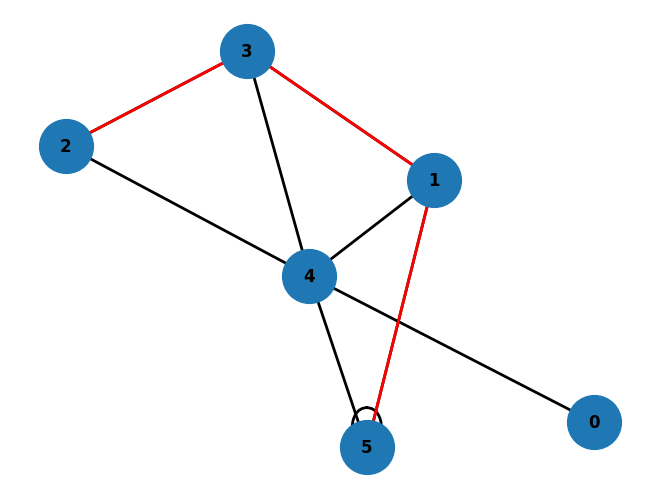

In [ ]:
# steps1 = [x + 1 for x in steps]



route_edges = [(steps[n],steps[n+1]) for n in range(len(steps)-1)]
G.add_nodes_from(steps)
G.add_edges_from(route_edges)


print(route_edges)

#path_edges = list(zip(steps[:-1], steps[1:]))
#print(path_edges)

options = {
    'node_size': 1500,
    'width': 2,
}

pos = nx.spring_layout(G)

nx.draw(G, pos=pos, with_labels=True, font_weight='bold', **options)

path_color = 'red'
nx.draw_networkx_edges(G, pos=pos, edgelist=route_edges, edge_color=path_color, **options)

#nx.draw_networkx_edges(G,pos=pos,edgelist=edgelist,edge_color = colors[ctr], width=linewidths[ctr])


Algoritmo de Dijkstra

In [ ]:
# Se instala la librería de dijkstra
!pip install Dijkstar


In [ ]:
# Se crea un grafo semejante al anteriormente realizado

grafo = Graph()
grafo.add_edge(0, 4, 1)
grafo.add_edge(4, 0, 1)
grafo.add_edge(4, 5, 1)
grafo.add_edge(5, 4, 1)
grafo.add_edge(4, 1, 1)
grafo.add_edge(1, 4, 1)
grafo.add_edge(4, 3, 1)
grafo.add_edge(3, 4, 1)
grafo.add_edge(4, 2, 1)
grafo.add_edge(2, 4, 1)
grafo.add_edge(5, 1, 1)
grafo.add_edge(1, 5, 1)
grafo.add_edge(1, 3, 1)
grafo.add_edge(3, 1, 1)
grafo.add_edge(3, 2, 1)
grafo.add_edge(2, 3, 1)


1

In [ ]:
# Se toma el mismo punto de partida que en el test, es decir, el nodo número 2. El nodo de llegada es el 5.
# Se llama a la función
camino = find_path(grafo, 2, 5)
print("Ruta tomada por el algoritmo = ",camino.nodes)
print("Costo total de la ruta = ",camino.total_cost)

Ruta tomada por el algoritmo =  [2, 4, 5]
Costo total de la ruta =  2


Como puede observarse. La solución que proporciona esta implementación del algoritmo de Dijkstra sigue siendo menos costosa. Pues encuentra un recorrido más corto hasta el Nodo 5.